In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# some scores were missing for CADD, PolyPhen2 and SIFT
# I ran the missing ones and updated the dataset
#df1 = pd.read_csv('Datasets/PTEN_MCF10A_ensembl_JC.csv', index_col=False)

# updated to include SVM results
df1 = pd.read_csv('Output Datasets/MCF10A scores_SVM_classification.csv', index_col=False)

In [3]:
print(df1)

   variant  MCF10A score  CADD  SNAP2  PolyPhen   SIFT  WT_RSA (%)  \
0      K6E        0.3311  26.6     67     0.155  0.990         NaN   
1      K6I        0.4544  27.3     64     0.244  1.000         NaN   
2     R15S        0.3870  25.0     65     0.123  1.000        53.3   
3     M35V        0.3606  25.0     44     0.914  1.000         0.0   
4     P38H        0.3521  26.1     44     1.000  1.000         0.0   
5     G44D        0.6232  26.0     65     0.968  1.000       117.5   
6     A79T        0.5711  23.0    -95     0.005  0.410        86.3   
7     D92N        0.2677  28.8     90     1.000  1.000        44.3   
8     H93Q        0.3301  26.1     77     1.000  1.000        74.5   
9     H93R        0.3930  27.0     83     0.998  0.970        74.5   
10   I101F        0.8803  26.0      6     0.998  1.000         0.2   
11   I101T        0.7138  29.0     44     0.998  1.000         0.2   
12   N117S        0.4916  21.0    -92     0.096  0.270        25.3   
13   H123Q        0.

# Data Visualization

In [4]:
def scatter_plotting(x, y, x_label, y_label, title, c, ax=None, **kwargs):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    
#    for i in range(len(cluster.labels_)): #plot each point + it's index as text above
#        ax.text(x[i], y[i],  '%s' % (str(df1.iloc[i,1])), size=8, color='k')
    
    ax.scatter(x, y, alpha=0.6, s=60, c=c, cmap='rainbow')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

In [5]:
# create a dendogram to determine how many clusters
import scipy.cluster.hierarchy as shc

def dendo_plotting(df, title, label):
    plt.figure(figsize=(8,4))  
    plt.title(title)   

    dend = shc.dendrogram(shc.linkage(df, method='ward'), 
                      labels=label,
                      leaf_font_size=9, leaf_rotation=90)

In [ ]:
# data1 = CADD, PolyPhen and SIFT
# these have more datapoints available

# data2 = MetaLR and REVEL
# these have fewer datapoints and more NaNs

In [16]:
data1 = df1[['MCF10A score', 'CADD', 'SNAP2', 'PolyPhen', 'SIFT', 'SVM']]
#data1 = df1[['MCF10A score', 'CADD', 'SNAP2']]
data1.insert(0, 'variant', df1['variant'] )
data1 = data1.dropna().reset_index(drop=True)
print(data1)

   variant  MCF10A score  CADD  SNAP2  PolyPhen  SIFT  SVM
0      K6E        0.3311  26.6     67     0.155  0.99  1.0
1      K6I        0.4544  27.3     64     0.244  1.00  1.0
2     R15S        0.3870  25.0     65     0.123  1.00  1.0
3     M35V        0.3606  25.0     44     0.914  1.00  1.0
4     P38H        0.3521  26.1     44     1.000  1.00  1.0
5     G44D        0.6232  26.0     65     0.968  1.00  1.0
6     A79T        0.5711  23.0    -95     0.005  0.41  1.0
7     D92N        0.2677  28.8     90     1.000  1.00  0.0
8     H93Q        0.3301  26.1     77     1.000  1.00  1.0
9     H93R        0.3930  27.0     83     0.998  0.97  1.0
10   I101F        0.8803  26.0      6     0.998  1.00  2.0
11   I101T        0.7138  29.0     44     0.998  1.00  2.0
12   N117S        0.4916  21.0    -92     0.096  0.27  1.0
13   H123Q        0.9934  25.0     82     0.998  0.98  2.0
14   H123Y        0.6383  25.0     80     0.996  1.00  1.0
15   C124S        0.8797  27.3     83     1.000  1.00  2

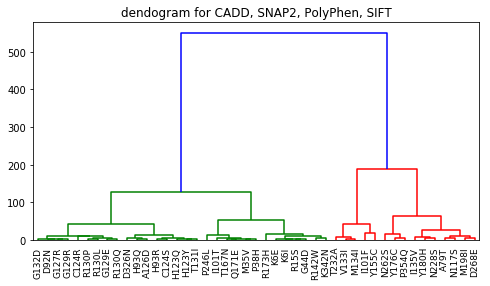

In [7]:
dendo_plotting(data1.iloc[:, 1:], 
               'dendogram for CADD, SNAP2, PolyPhen, SIFT', data1['variant'].tolist())
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/Predictions_MCF10A_dendogram.pdf', transparent=True, dpi=200)
plt.show()

In [ ]:
# MinMax scaling of data
from sklearn.preprocessing import MinMaxScaler

data1_scaled = pd.DataFrame(MinMaxScaler().fit_transform(data1.iloc[:,1:]))
data1_scaled.columns = ['MCF10A score', 'CADD', 'PolyPhen', 'SIFT']
#data1_scaled.columns = ['MCF10A score', 'CADD', 'SNAP2']

print(data1_scaled)

In [ ]:
dendo_plotting(data1_scaled, 
               'dendogram for scaled data', data1['variant'].tolist())
plt.show()

In [ ]:
data2 = df1[['MCF10A score', 'MetaLR', 'REVEL']]
data2.insert(0, 'variant', df1['variant'] )
data2 = data2.dropna().reset_index(drop=True)

dendo_plotting(data2.iloc[:, 1:], 
               'dendogram for MetaLR, REVEL', data2['variant'].tolist())

#mpl.rcParams['pdf.fonttype'] = 42
#plt.savefig('Mighell_MCF10A_dendogram.pdf', transparent=True, dpi=200)

plt.show()

In [8]:
# create clusters
from sklearn.cluster import AgglomerativeClustering

# the "cluster" method returns the names of the clusters 
# that each data point belongs to.

#cluster = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
#cluster.fit_predict(data1)

cluster1 = AgglomerativeClustering(n_clusters=4, 
                                   affinity = 'euclidean', 
                                   linkage = 'ward').fit_predict(data1.iloc[:,1:])

#cluster2 = AgglomerativeClustering(n_clusters=3, 
#                                   affinity = 'euclidean', 
 #                                  linkage = 'ward').fit_predict(data2.iloc[:,1:])

In [9]:
cluster1

array([1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 2, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 3, 1,
       0])

In [ ]:
# scatter plot trial_1, color-coding according to clustering

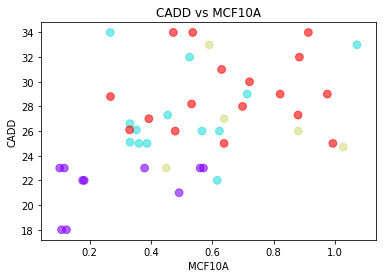

In [11]:
# note: 
# scatter_plotting(x, y, x_label, y_label, title, c, ax=None, **kwargs)

scatter_plotting(data1['MCF10A score'], data1['CADD'], 
                 'MCF10A','CADD', 'CADD vs MCF10A', cluster1)
#mpl.rcParams['pdf.fonttype'] = 42
#plt.savefig('Output PDFs/CADD vs MCF10A.pdf', transparent=True, dpi=200)

#scatter_plotting(data1_scaled['MCF10A score'], data1_scaled['SNAP2'], 
#                 'MCF10A','SNAP2', 'SNAP2 vs MCF10A', cluster1)
#plt.savefig('Output PDFs/SNAP2 vs MCF10A.pdf', transparent=True, dpi=200)

#scatter_plotting(data1_scaled['MCF10A score'], data1_scaled['PolyPhen'], 
#                 'MCF10A','PolyPhen2', 'PolyPhen2 vs MCF10A', cluster1)
#plt.savefig('Output PDFs/PolyPhen2 vs MCF10A.pdf', transparent=True, dpi=200)

#scatter_plotting(data1_scaled['MCF10A score'], data1_scaled['SIFT'], 
#                 'MCF10A','SIFT', 'SIFT vs MCF10A', cluster1)
#plt.savefig('Output PDFs/SIFT vs MCF10A.pdf', transparent=True, dpi=200)

plt.show()

In [12]:
cluster1.shape

(45,)

In [14]:
df1['SVM'].shape

(47,)

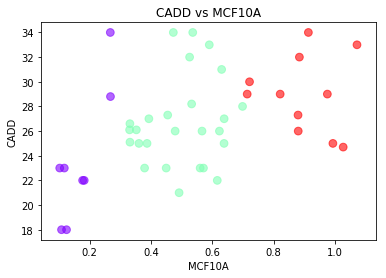

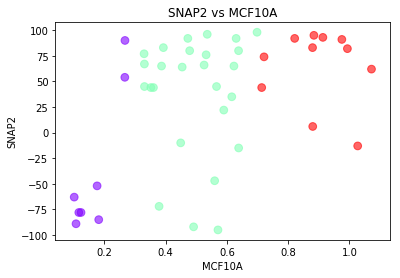

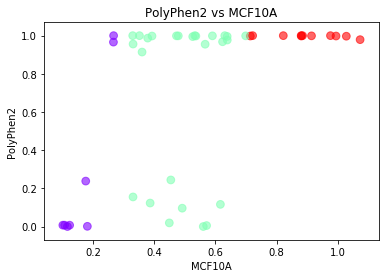

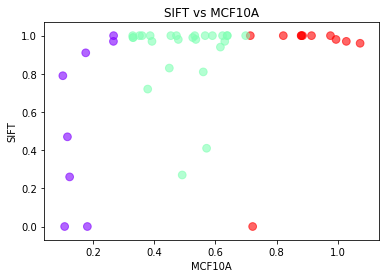

In [19]:
# scatter plot trial_2, color-coding according to SVM results

color_ref = data1['SVM']

scatter_plotting(data1['MCF10A score'], data1['CADD'], 
                 'MCF10A','CADD', 'CADD vs MCF10A', color_ref)
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/CADD vs MCF10A.pdf', transparent=True, dpi=200)

scatter_plotting(data1['MCF10A score'], data1['SNAP2'], 
                 'MCF10A','SNAP2', 'SNAP2 vs MCF10A', color_ref)
plt.savefig('Output PDFs/SNAP2 vs MCF10A.pdf', transparent=True, dpi=200)

scatter_plotting(data1['MCF10A score'], data1['PolyPhen'], 
                 'MCF10A','PolyPhen2', 'PolyPhen2 vs MCF10A', color_ref)
plt.savefig('Output PDFs/PolyPhen2 vs MCF10A.pdf', transparent=True, dpi=200)

scatter_plotting(data1['MCF10A score'], data1['SIFT'], 
                 'MCF10A','SIFT', 'SIFT vs MCF10A', color_ref)
plt.savefig('Output PDFs/SIFT vs MCF10A.pdf', transparent=True, dpi=200)

plt.show()

In [ ]:
# cluster 1 corresponds to data1 (CADD, PolyPhen and SIFT)
# cluster 2 => MetaLR and REVEL

In [ ]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

x = data1['MCF10A score']
y = data1['CADD']

ax1.scatter(x, y, alpha=0.6, s=60, c='b')
ax2.scatter(x, y, alpha=0.6, s=60, c=cluster1, cmap='rainbow')

plt.show()

In [ ]:
# note: 
# scatter_plotting(x, y, x_label, y_label, title, c, ax=None, **kwargs)

scatter_plotting(data1['MCF10A score'], data1['CADD'], 
                 'MCF10A','CADD', 'CADD vs MCF10A', cluster1)
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/CADD vs MCF10A.pdf', transparent=True, dpi=200)

scatter_plotting(data1['MCF10A score'], data1['SNAP2'], 
                 'MCF10A','SNAP2', 'SNAP2 vs MCF10A', cluster1)
plt.savefig('Output PDFs/SNAP2 vs MCF10A.pdf', transparent=True, dpi=200)

scatter_plotting(data1['MCF10A score'], data1['PolyPhen'], 
                 'MCF10A','PolyPhen2', 'PolyPhen2 vs MCF10A', cluster1)
plt.savefig('Output PDFs/PolyPhen2 vs MCF10A.pdf', transparent=True, dpi=200)

scatter_plotting(data1['MCF10A score'], data1['SIFT'], 
                 'MCF10A','SIFT', 'SIFT vs MCF10A', cluster1)
plt.savefig('Output PDFs/SIFT vs MCF10A.pdf', transparent=True, dpi=200)

plt.show()

In [ ]:
scatter_plotting(data2['MCF10A score'], data2['MetaLR'], 
                 'MCF10A','MetaLR', 'MetaLR vs MCF10A', cluster2)
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/MetaLR vs MCF10A.pdf', transparent=True, dpi=200)

scatter_plotting(data2['MCF10A score'], data2['REVEL'], 
                 'MCF10A','REVEL', 'REVEL vs MCF10A', cluster2)
plt.savefig('Output PDFs/REVEL vs MCF10A.pdf', transparent=True, dpi=200)

plt.show()

In [ ]:
# Pearson correlation

def pearson(data1, data2):
    from scipy.stats import pearsonr
    corr = pearsonr(data1, data2)[0]
    p_val = pearsonr(data1, data2)[1]
    print('Correlation: {0:.4f}'.format(corr))
    print('Two Tailed P Value: {0:.4f}'.format(p_val))

In [ ]:
print("Pearson correlation for CADD vs MCF10A is:")
pearson(data1['CADD'], data1['MCF10A score'])

In [ ]:
print("Pearson correlation for CADD vs MCF10A is:")
pearson(data1['SNAP2'], data1['MCF10A score'])